# DataFrame 1: Batallas
La columna "major death" indica si ha habido una muerte relevante (1/0)

Relacionar batalla con capítulo y nº de espectadores

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df_battles = pd.read_csv('../data/battles.csv')
df_battles

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN
6,Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Darry,...,0.0,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,1.0,Darry,The Riverlands,NaN
7,Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,NaN,NaN,Victarion Greyjoy,NaN,1.0,Moat Cailin,The North,NaN
8,Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,1000.0,NaN,Asha Greyjoy,NaN,1.0,Deepwood Motte,The North,NaN
9,Battle of the Stony Shore,299,10,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,264.0,NaN,Theon Greyjoy,NaN,1.0,Stony Shore,The North,Greyjoy's troop number based on the Battle of ...


In [31]:
df_battles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                38 non-null     object 
 1   year                38 non-null     int64  
 2   battle_number       38 non-null     int64  
 3   attacker_king       36 non-null     object 
 4   defender_king       35 non-null     object 
 5   attacker_1          38 non-null     object 
 6   attacker_2          10 non-null     object 
 7   attacker_3          3 non-null      object 
 8   attacker_4          2 non-null      object 
 9   defender_1          37 non-null     object 
 10  defender_2          2 non-null      object 
 11  defender_3          0 non-null      float64
 12  defender_4          0 non-null      float64
 13  attacker_outcome    37 non-null     object 
 14  battle_type         37 non-null     object 
 15  major_death         37 non-null     float64
 16  major_capt

In [32]:
df_battles.describe(include = "all")

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
count,38,38.000000,38.000000,36,35,38,10,3,2,37,...,37.000000,37.000000,24.000000,19.000000,37,28,37.000000,37,38,5
unique,38,NaN,NaN,4,6,11,7,2,1,12,...,NaN,NaN,NaN,NaN,31,28,NaN,27,7,5
top,Battle of the Golden Tooth,NaN,NaN,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,Mormont,Glover,Lannister,...,NaN,NaN,NaN,NaN,Gregor Clegane,"Clement Piper, Vance",NaN,Riverrun,The Riverlands,Greyjoy's troop number based on the Battle of ...
freq,1,NaN,NaN,14,14,8,3,2,2,9,...,NaN,NaN,NaN,NaN,4,1,NaN,3,17,1
mean,NaN,299.105263,19.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.351351,0.297297,9942.541667,6428.157895,NaN,NaN,0.702703,NaN,NaN,NaN
std,NaN,0.689280,11.113055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.483978,0.463373,20283.092065,6225.182106,NaN,NaN,0.463373,NaN,NaN,NaN
min,NaN,298.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,20.000000,100.000000,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,299.000000,10.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,1375.000000,1070.000000,NaN,NaN,0.000000,NaN,NaN,NaN
50%,NaN,299.000000,19.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,4000.000000,6000.000000,NaN,NaN,1.000000,NaN,NaN,NaN
75%,NaN,300.000000,28.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,8250.000000,10000.000000,NaN,NaN,1.000000,NaN,NaN,NaN


Voy a eliminar las columnas con muchos nulos y las columnas que no me interesan para el EDA:

In [33]:
df_battles_clean = df_battles.drop(["year","battle_number","location","region","major_capture","battle_type","attacker_2","attacker_3","attacker_4","defender_2","defender_3","defender_4","note"], axis=1)
df_battles_clean

,name,attacker_king,defender_king,attacker_1,defender_1,attacker_outcome,major_death,attacker_size,defender_size,attacker_commander,defender_commander,summer
0,Battle of the Golden Tooth,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,win,1.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0
1,Battle at the Mummer's Ford,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Baratheon,win,1.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0
2,Battle of Riverrun,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,win,0.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0
3,Battle of the Green Fork,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,loss,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0
4,Battle of the Whispering Wood,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,win,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0
5,Battle of the Camps,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,win,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0
6,Sack of Darry,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Darry,win,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,1.0
7,Battle of Moat Cailin,Balon/Euron Greyjoy,Robb Stark,Greyjoy,Stark,win,0.0,NaN,NaN,Victarion Greyjoy,NaN,1.0
8,Battle of Deepwood Motte,Balon/Euron Greyjoy,Robb Stark,Greyjoy,Stark,win,0.0,1000.0,NaN,Asha Greyjoy,NaN,1.0
9,Battle of the Stony Shore,Balon/Euron Greyjoy,Robb Stark,Greyjoy,Stark,win,0.0,264.0,NaN,Theon Greyjoy,NaN,1.0


In [34]:
df_battles_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                38 non-null     object 
 1   attacker_king       36 non-null     object 
 2   defender_king       35 non-null     object 
 3   attacker_1          38 non-null     object 
 4   defender_1          37 non-null     object 
 5   attacker_outcome    37 non-null     object 
 6   major_death         37 non-null     float64
 7   attacker_size       24 non-null     float64
 8   defender_size       19 non-null     float64
 9   attacker_commander  37 non-null     object 
 10  defender_commander  28 non-null     object 
 11  summer              37 non-null     float64
dtypes: float64(4), object(8)
memory usage: 3.7+ KB


In [35]:
df_battles_clean.to_csv("../data_clean/df_battles_clean.csv", index=False)

**Q:** ¿El ejército atacante ha ganado más veces que el atacado?​

**A:** Sí, ha ganado al menos 32 de las 38 batallas

In [36]:
conteo_resultados = df_battles_clean['attacker_outcome'].value_counts()
conteo_resultados

attacker_outcome
win     32
loss     5
Name: count, dtype: int64

Voy a crear algún gráfico sencillo para visualizar datos interesantes de la tabla:

In [37]:
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

# Algunas configuraciones de los paquetes
pd.set_option("display.max_rows", 500) # Cuántas filas de los DataFrames nos "escupe" pandas en el Notebook
# sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")



**Q:** ¿El ejercito con más miembros siempre ha ganado?

**A:** No



In [38]:
# QUITAR NANs:
df_tamanos = df_battles_clean.dropna(subset=['attacker_size', 'defender_size'])


In [39]:
def comparar_tamanos(fila):
    if fila['attacker_size'] > fila['defender_size']:
        return 'attacker'
    elif fila['attacker_size'] < fila['defender_size']:
        return 'defender'
    else:
        return 'igual'

df_tamanos['ejercito_mas_grande'] = df_tamanos.apply(comparar_tamanos, axis=1)

In [40]:
# Filtrar batallas donde el atacante tenía más ejército
ganan_con_mas = df_tamanos[(df_tamanos['ejercito_mas_grande'] == 'attacker') &
                           (df_tamanos['attacker_outcome'] == 'win')]

# Filtrar batallas donde el defensor tenía más ejército y el atacante perdió
pierden_con_menos = df_tamanos[(df_tamanos['ejercito_mas_grande'] == 'defender') &
                               (df_tamanos['attacker_outcome'] == 'loss')]

# Total de batallas en las que alguien tenía más ejército
total_batallas_con_diferencia = df_tamanos[df_tamanos['ejercito_mas_grande'] != 'igual'].shape[0]

# Total de veces que ganó el ejército más grande
ganadas_por_mayor = ganan_con_mas.shape[0] + pierden_con_menos.shape[0]

print(f"En {ganadas_por_mayor} de {total_batallas_con_diferencia} batallas (≈ {ganadas_por_mayor / total_batallas_con_diferencia:.1%}) ganó el ejército más grande.")


En 4 de 14 batallas (≈ 28.6%) ganó el ejército más grande.


In [41]:
if ganadas_por_mayor == total_batallas_con_diferencia:
    print("✅ Siempre ganó el ejército más grande.")
else:
    print("❌ No siempre ganó el ejército más grande.")

❌ No siempre ganó el ejército más grande.


In [42]:
def gano_el_mas_grande(fila):
    if fila['ejercito_mas_grande'] == 'attacker' and fila['attacker_outcome'] == 'win':
        return 'Sí'
    elif fila['ejercito_mas_grande'] == 'defender' and fila['attacker_outcome'] == 'loss':
        return 'Sí'
    elif fila['ejercito_mas_grande'] == 'igual':
        return 'Empate'
    else:
        return 'No'

df_tamanos['gano_mas_grande'] = df_tamanos.apply(gano_el_mas_grande, axis=1)


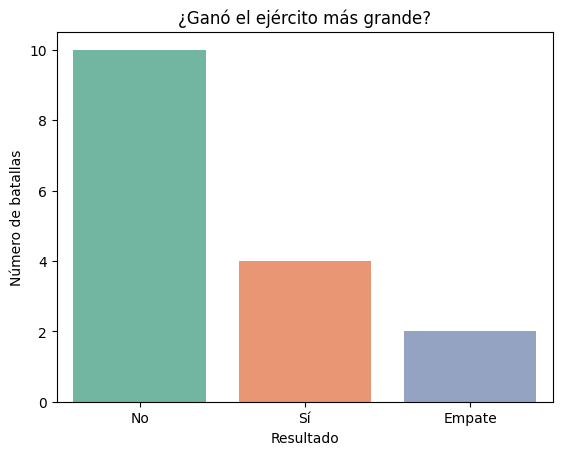

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contamos los casos
conteo = df_tamanos['gano_mas_grande'].value_counts()

# Gráfico de barras
sns.barplot(x=conteo.index, y=conteo.values, palette='Set2')

plt.title("¿Ganó el ejército más grande?")
plt.ylabel("Número de batallas")
plt.xlabel("Resultado")
plt.show()


❔¿Qué casa ha comenzado más batallas?

In [44]:
df_battles_clean['attacker_king'].value_counts()

attacker_king
Joffrey/Tommen Baratheon    14
Robb Stark                  10
Balon/Euron Greyjoy          7
Stannis Baratheon            5
Name: count, dtype: int64

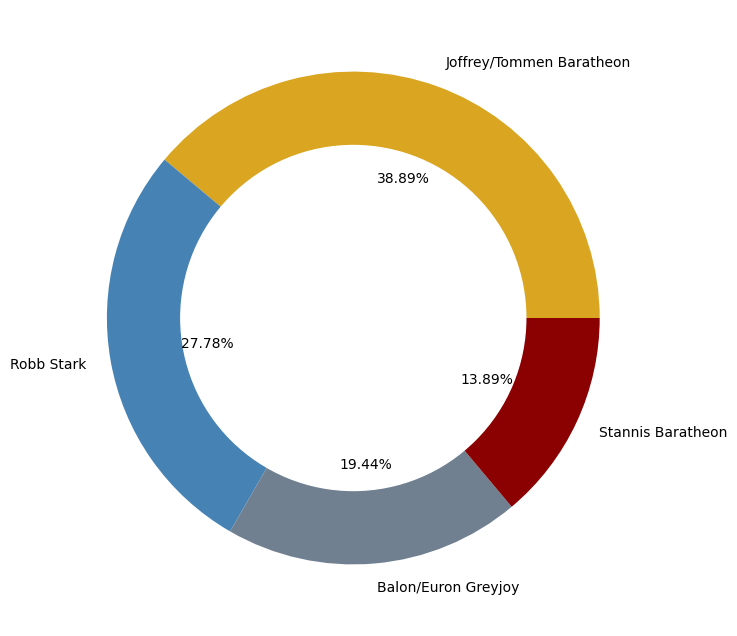

In [58]:
# create data
data = df_battles["attacker_king"].value_counts()

colors = sns.color_palette("pastel")[0:len(data)]  # paleta pastel 
# # Create a circle for the center of the plot
my_circle=plt.Circle( (0,0),
                     0.7, # Grosor del donut
                     color="white")

plt.figure(figsize=(8,8))

plt.pie(data.values,
        labels=data.index,
        colors=("#DAA520","#4682B4","#708090","#8B0000"),
        autopct='%1.2f%%');

p=plt.gcf()
p.gca().add_artist(my_circle);

**Q:** ¿Quiénes han luchado por Joffrey/Tommen?

**A:** Los Lannister, Bolton, Baratheon, Frey y Bracken 

In [45]:
JTBaratheon_batallas = df_battles_clean[df_battles_clean['attacker_king'] == 'Joffrey/Tommen Baratheon']
JTBaratheon_batallas['attacker_1']

0     Lannister
1     Lannister
2     Lannister
6     Lannister
13       Bolton
16    Lannister
23    Lannister
24    Lannister
25         Frey
28       Bolton
33    Baratheon
34    Baratheon
35    Lannister
36      Bracken
Name: attacker_1, dtype: object

In [46]:
JTBaratheon_batallas['attacker_1'].value_counts()

attacker_1
Lannister    8
Bolton       2
Baratheon    2
Frey         1
Bracken      1
Name: count, dtype: int64

**Q:** qué casa ha sido menos leal (ha luchado por más reyes)

**A:** Los Bolton y los Frey

In [47]:
# Agrupamos por attacker_1 y contamos cuántos reyes distintos ha tenido
casas_menos_leales = df_battles_clean.groupby('attacker_1')['attacker_king'].nunique()

# Ordenamos de mayor a menor
casas_menos_leales = casas_menos_leales.sort_values(ascending=False)

print(casas_menos_leales)

attacker_1
Baratheon                      2
Frey                           2
Bolton                         1
Bracken                        1
Free folk                      1
Greyjoy                        1
Darry                          1
Lannister                      1
Stark                          1
Brave Companions               0
Brotherhood without Banners    0
Name: attacker_king, dtype: int64


In [48]:
df_battles_clean2 = df_battles.drop(["year","battle_number","major_capture","attacker_2","attacker_3","attacker_4","defender_2","defender_3","defender_4","note"], axis=1)
df_battles_clean2

,name,attacker_king,defender_king,attacker_1,defender_1,attacker_outcome,battle_type,major_death,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region
0,Battle of the Golden Tooth,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,win,pitched battle,1.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands
1,Battle at the Mummer's Ford,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Baratheon,win,ambush,1.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands
2,Battle of Riverrun,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,win,pitched battle,0.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands
3,Battle of the Green Fork,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,loss,pitched battle,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands
4,Battle of the Whispering Wood,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,win,ambush,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands
5,Battle of the Camps,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,win,ambush,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands
6,Sack of Darry,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Darry,win,pitched battle,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,1.0,Darry,The Riverlands
7,Battle of Moat Cailin,Balon/Euron Greyjoy,Robb Stark,Greyjoy,Stark,win,pitched battle,0.0,NaN,NaN,Victarion Greyjoy,NaN,1.0,Moat Cailin,The North
8,Battle of Deepwood Motte,Balon/Euron Greyjoy,Robb Stark,Greyjoy,Stark,win,siege,0.0,1000.0,NaN,Asha Greyjoy,NaN,1.0,Deepwood Motte,The North
9,Battle of the Stony Shore,Balon/Euron Greyjoy,Robb Stark,Greyjoy,Stark,win,ambush,0.0,264.0,NaN,Theon Greyjoy,NaN,1.0,Stony Shore,The North


In [49]:
df_battles_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                38 non-null     object 
 1   attacker_king       36 non-null     object 
 2   defender_king       35 non-null     object 
 3   attacker_1          38 non-null     object 
 4   defender_1          37 non-null     object 
 5   attacker_outcome    37 non-null     object 
 6   battle_type         37 non-null     object 
 7   major_death         37 non-null     float64
 8   attacker_size       24 non-null     float64
 9   defender_size       19 non-null     float64
 10  attacker_commander  37 non-null     object 
 11  defender_commander  28 non-null     object 
 12  summer              37 non-null     float64
 13  location            37 non-null     object 
 14  region              38 non-null     object 
dtypes: float64(4), object(11)
memory usage: 4.6+ KB


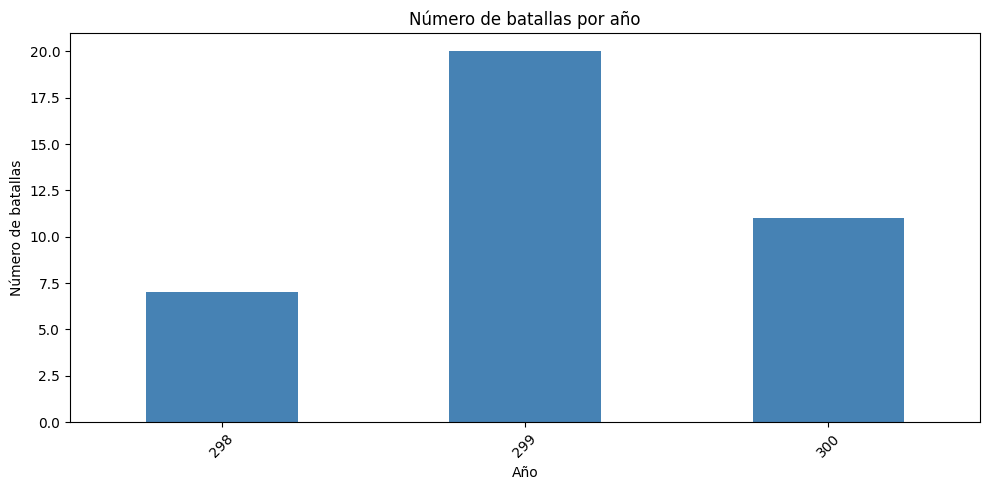

In [50]:
battle_counts = df_battles.groupby('year').size()

plt.figure(figsize=(10, 5))
battle_counts.plot(kind='bar', color='steelblue')
plt.title('Número de batallas por año')
plt.xlabel('Año')
plt.ylabel('Número de batallas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

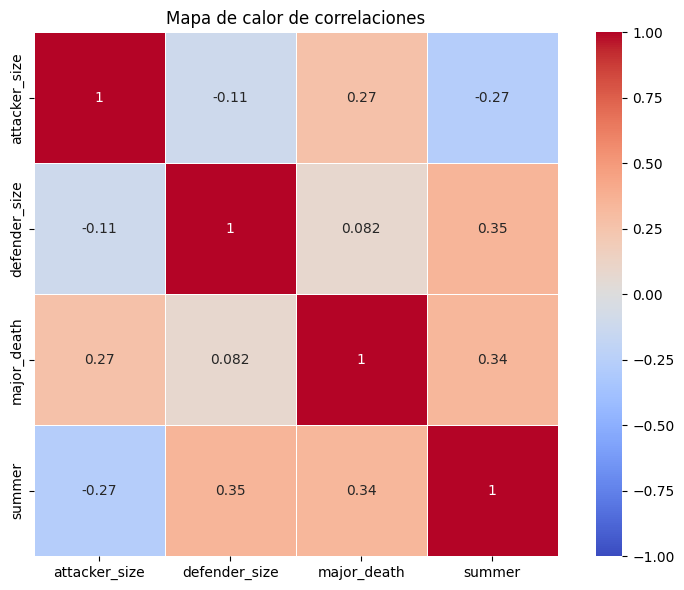

In [51]:


# Seleccionamos solo columnas numéricas relevantes
cols_numericas = ['attacker_size', 'defender_size', 'major_death', 'summer']
df_numerico = df_battles[cols_numericas]

# Calculamos la matriz de correlación
correlation_matrix = df_numerico.corr()

# Pintamos el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,
            annot=True,         # Mostrar los valores
            cmap='coolwarm',    # Paleta de colores
            vmin=-1, vmax=1,    # Rango de correlación
            linewidths=0.5,
            square=True)

plt.title("Mapa de calor de correlaciones")
plt.tight_layout()
plt.show()


Para mostrar la relación entre el tipo de batalla (battle_type), el tamaño del atacante (attacker_size) y el resultado del atacante (attacker_outcome), puedes usar un gráfico de violín o boxplot con Seaborn. Esto te permitirá ver:

La distribución del tamaño del atacante.

Cómo varía según el tipo de batalla.

Y cómo influye el resultado (ganó o perdió)

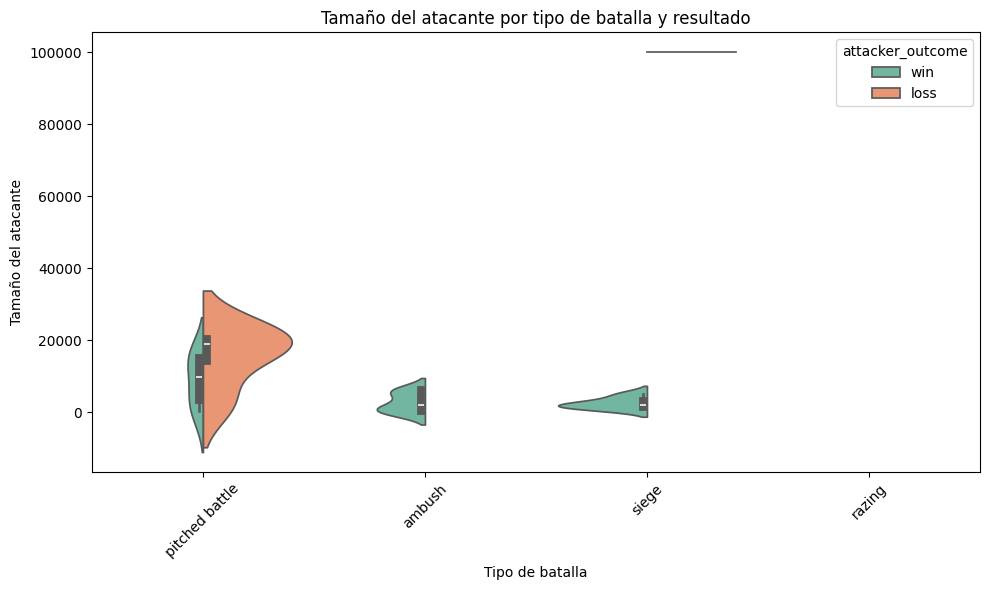

In [ ]:


plt.figure(figsize=(10, 6))

sns.violinplot(
    data=df_battles,
    x='battle_type',
    y='attacker_size',
    hue='attacker_outcome',    # Resultado del atacante
    split=True,                # Superpone resultados en un mismo violín
    palette='Set2'
)

plt.title('Tamaño del atacante por tipo de batalla y resultado')
plt.xlabel('Tipo de batalla')
plt.ylabel('Tamaño del atacante')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
